## Manim Examples

Collection of examples using Manim. Check the blog post related to this notebook here:
* https://andresberejnoi.com/using-manim-and-python-to-create-animations-like-3blue1brown

In [2]:
from manim import *
import numpy as np

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.3

In [11]:
%%manim -qk ShapeAndTextScene

class ShapeAndTextScene(Scene):
    def construct(self):
        text = Tex("Example Scene With Some Shapes")

        circle = Circle()
        circle.set_fill(BLUE, opacity=0.8)

        hexagon = RegularPolygon(n=6)
        hexagon.set_fill(GREEN, opacity=0.5)

        self.play(Write(text))
        self.play(text.animate.shift(UP*3))
        self.wait(0.3)
        self.play(DrawBorderThenFill(circle))
        self.wait()

        self.play(Transform(circle, hexagon,run_time=1.5), )
        self.wait(0.5)

        self.play(hexagon.copy().animate.shift(LEFT * 3))
        self.wait(0.35)
        self.play(hexagon.copy().animate.shift(RIGHT * 3))
        self.wait()


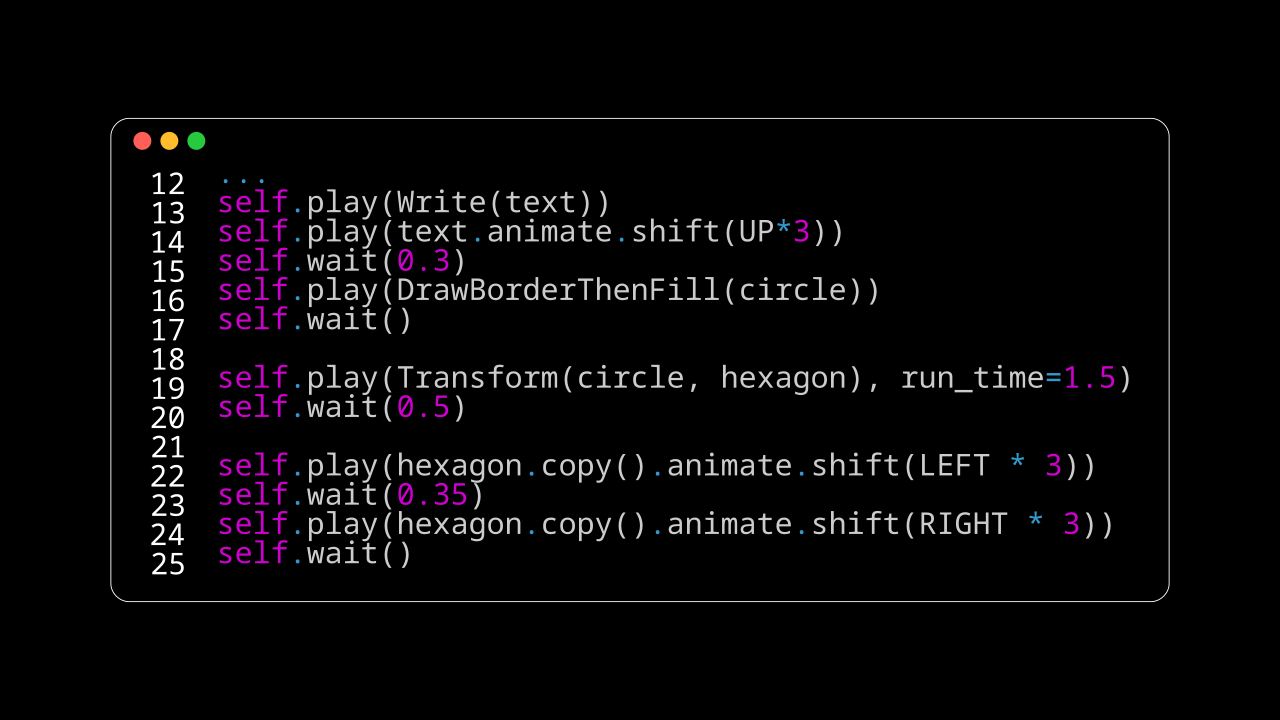

In [82]:
%%manim -sqm CodeExamplePart2

class CodeExamplePart1(Scene):
    def construct(self):
        code = '''
%%manim -qh ShapeAndTextScene

class ShapeAndTextScene(Scene):
    def construct(self):
        text = Tex("Example Scene With Some Shapes")

        circle = Circle()
        circle.set_fill(BLUE, opacity=0.8)

        hexagon = RegularPolygon(n=6)
        hexagon.set_fill(GREEN, opacity=0.5)
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace",
                            line_no_from=1,)
        self.play(Create(rendered_code), run_time=5)
        self.wait(2)

class CodeExamplePart2(Scene):
    def construct(self):
        code = '''
        ...
        self.play(Write(text))
        self.play(text.animate.shift(UP*3))
        self.wait(0.3)
        self.play(DrawBorderThenFill(circle))
        self.wait()

        self.play(Transform(circle, hexagon), run_time=1.5)
        self.wait(0.5)

        self.play(hexagon.copy().animate.shift(LEFT * 3))
        self.wait(0.35)
        self.play(hexagon.copy().animate.shift(RIGHT * 3))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace",
                            line_no_from=12,)
        self.play(Create(rendered_code), run_time=5)
        self.wait(2)

In [12]:
%%manim -qk MatrixExample

class MatrixExample(Scene):
    def construct(self):

        elements1 = [
            [0.158, '\\pi', -4.325],
            [11   ,    0  , 3.876],
        ]

        #create Matrix Mobject
        mat1 = Matrix(
            elements1,
            left_bracket = '\\{',
            right_bracket = '\\}',
            v_buff=1.3,
            h_buff=2.5,
        )

        #create column rectangles ahead of time (they will added to the scene later)
        col0 = SurroundingRectangle(mat1.get_columns()[0])
        col1 = SurroundingRectangle(mat1.get_columns()[1]) 
        col2 = SurroundingRectangle(mat1.get_columns()[2])

        #animate creation of the matrix
        self.play(Create(mat1), run_time=2)
        self.wait()

        # animate surrounding rectangles for each column
        self.play(Create(col0))
        self.wait()

        self.play(Transform(col0, col1, replace_mobject_with_target_in_scene=True))
        self.wait()      

        self.play(Transform(col1, col2, replace_mobject_with_target_in_scene=True))
        self.wait()
        self.play(Uncreate(col2))

        # change size of the entire matrix and shift its position
        self.play(mat1.animate.scale(0.7).shift(LEFT*3.5 + UP*2))
        self.wait()

## Automating Neural Network Layer Generation
Since each layer usually looks very similar, this is a perfect task to automate. I created the following helper functions to encapsulate the repetitive parts of the neural network animation.

In [6]:
def generate_network_layer(
    num_nodes, 
    include_bias    = True, 
    layer_type      = 'hidden', 
    orientation     = 'vertical',
    node_buffer     = 0.75, 
    add_node_labels = True,
    font_size       = 30,
    add_layer_label = True,
    layer_font_size = 35,
    layer_idx       = None,
    shape_params:dict = {},
    ):


    node_shape = None
    if layer_type.lower() == 'input':
        node_shape = Square
        default_shape_params = {
            'side_length'  : 1,
            'fill_opacity' : 0.6,
            'color'        : GREEN
        }

        shape_params = default_shape_params | shape_params

    elif layer_type.lower() == 'hidden':
        node_shape = Circle
        default_shape_params = {
            'radius'       : 0.6,
            'fill_opacity' : 0.6,
            'color'        : BLUE
        }

        shape_params = default_shape_params | shape_params

    elif layer_type.lower() == 'output':
        node_shape = Circle 
        default_shape_params = {
            'radius'       : 0.6,
            'fill_opacity' : 0.6,
            'color'        : BLUE
        }

        shape_params = default_shape_params | shape_params

    else:
        node_shape = Circle
        default_shape_params = {
            'radius'       : 0.6,
            'fill_opacity' : 0.6,
            'color'        : BLUE
        }
        
        shape_params = default_shape_params | shape_params


    layer_group = VGroup()  #this group will contain everything here to return

    #-- Create regular nodes and add them to a group
    layer_nodes = VGroup(*[node_shape(**shape_params) for i in range(num_nodes)])
    
    layer_group.add(layer_nodes)

    #-- Create bias node and add it to the group
    if include_bias:
        bias_node = input_bias  = Circle(color=RED, fill_opacity=0.6, radius=0.35)
        bias_node.is_bias_node = True   #add custom attribute to check layer
        layer_nodes.add(bias_node)  #add temporarily here to make arrangement easier


    #-- Arrange the nodes either in a vertical column or in a horizontal row
    if orientation.lower() == 'horizontal' or orientation.lower() == 'h':
        layer_nodes.arrange(LEFT, buff=node_buffer)
    elif orientation.lower() == 'vertical' or orientation.lower() == 'v':
        layer_nodes.arrange(DOWN, buff=node_buffer)


    #-- remove bias node to make labeling simpler
    if include_bias:
        layer_nodes -= bias_node
        #layer_group.add(bias_node)

    #-- add main label to layer
    if add_layer_label:
        if layer_idx is None:
            if layer_type.lower()[0] == 'i':
                layer_idx=0
            else:
                layer_idx='n'
            
        layer_label = Tex(fr"{layer_type.capitalize()} Layer (\(L_{layer_idx}\))", font_size=layer_font_size)
        layer_label.next_to(layer_nodes, UP, buff=0.25)

        layer_group.add(layer_label)

    #-- add labels to main nodes
    if add_node_labels:
        label_letter = layer_type.lower()[0]    #use the first letter of the layer type
        node_labels = VGroup(*
            [
                Tex(
                    fr"\({label_letter}_{i}\)", 
                    font_size=font_size
                )
                for i in range(num_nodes)
            ]           
        )
        
        for label, node in zip(node_labels, layer_nodes):
            label.move_to(node)

        layer_group.add(node_labels)

        if include_bias:
            bias_label = Tex(r"b", font_size=font_size)
            bias_label.move_to(bias_node)
            layer_group.add(bias_label)

    # add bias node back into the layer_nodes group
    if include_bias:
        layer_nodes.add(bias_node)


    #-- Return the group containing all the nodes and labels
    return layer_group

In [7]:
def generate_layer_connections(source_layer:VGroup, target_layer:VGroup, arrow_width=2.5):
    '''source_layer and target_layer are both VGroups containing only nodes and bias'''
    arrow_group = VGroup() 

    for j, target_node in enumerate(target_layer):
        if hasattr(target_node,'is_bias_node'): #skip bias nodes for incoming arrows from previous layer
            continue

        for i, source_node in enumerate(source_layer):
            arrow = Arrow(
                source_layer[i].get_right(), 
                target_layer[j].get_left(), 
                stroke_width=arrow_width,
            )
            arrow_group.add(arrow)

    return arrow_group

def generate_random_labeled_layer_connections(
        source_layer:VGroup, 
        target_layer:VGroup, 
        arrow_width=2.5, 
        label_position=0.15, 
        font_size=10, 
        add_frame=True, 
        weights:np.ndarray|list[list] = None):
    
    """
    
    Parameters
    ----------
    weights: np.array | list[list]
        A 2d array with shape = (len(source_layer) , len(target_layer))
    """
    
    arrow_group = VGroup()

    if weights is None:
        weights = np.random.uniform(-0.6, 0.6, size=(len(source_layer), len(target_layer)))
    elif isinstance(weights, np.array):
        assert(weights.shape == (len(source_layer), len(target_layer)))
    elif isinstance(weights, list):
        assert( (len(weights), len(weights[0])) == (len(source_layer), len(target_layer))    )
        weights = np.array(weights)
    else:
        print(f"Unsupported type `{weights.type}` for 'weights'.")
        raise TypeError

    for j, target_node in enumerate(target_layer):
        if hasattr(target_node, 'is_bias_node'):
            continue 

        for i, source_node in enumerate(source_layer):
            arrow = LabeledArrow(
                #label = f"{np.random.uniform(-0.6, 0.6):.2f}",
                label = f"{weights[i,j]:.2f}",
                label_position = label_position,
                font_size = font_size,
                label_frame = add_frame,
                start = source_layer[i].get_right(),
                end   = target_layer[j].get_left(),
                stroke_width = arrow_width
            )
            arrow_group.add(arrow)

    return arrow_group

## LabeledLine and LabeledArrow
I wrote two new custom classes that inherit from Manim's `Line` and `Arrow` Mobjects. The new classes, `LabeledLine` and `LabeledArrow`, behave like their parents except that you supply a label to be put in a box somewhere along the lenght of the shape. I created a [pull request](https://github.com/ManimCommunity/manim/pull/3264) on Manim's GitHub repository, so we'll see how it goes. Meanwhile, I'm adding those classes here because they are useful when creating a neural network animation.

In [8]:
class LabeledLine(Line):
    def __init__(
        self, 
        label, 
        label_position:float=0.5, 
        font_size=15,
        label_color=WHITE,
        label_frame=True,
        frame_fill_color=None,
        frame_fill_opacity=1,
        *args, 
        **kwargs,
    ) -> None:
        
        if isinstance(label, str):
            from manim import MathTex

            rendered_label = MathTex(label, color=label_color, font_size=font_size)
        else:
            rendered_label = label

        super().__init__(*args, **kwargs)

        #calculating the vector for the label position
        line_start, line_end = self.get_start_and_end()
        new_vec = (line_end - line_start) * label_position
        label_coords = line_start + new_vec

        #rendered_label.move_to(self.get_vector() * label_position)
        rendered_label.move_to(label_coords)

        box = BackgroundRectangle(rendered_label, buff=0.05, color=frame_fill_color, fill_opacity=frame_fill_opacity, stroke_width=0.5)
        self.add(box)
        
        if label_frame:
            box_frame = SurroundingRectangle(rendered_label, buff=0.05, color=label_color, stroke_width=0.5)

            self.add(box_frame)
            
        self.add(rendered_label)

        #self.label_position = label_position


class LabeledArrow(LabeledLine, Arrow):
    def __init__(
        self, 
        *args,
        **kwargs,
    ) -> None:
        
        super().__init__(*args, **kwargs)

## Animating The Neural Network

In [13]:

%%manim -qk TestNetwork

class TestNetwork(Scene):
    def construct(self,):

        #--Constants and Stuff
        _shift_val = 4
        _run_time  = 1

        #--Create the layers
        input_layer = generate_network_layer(
            num_nodes       = 2,
            include_bias    = True, 
            layer_type      = 'input', 
            layer_idx       = 0,
        )

        hidden_layer = generate_network_layer(
            num_nodes       = 3,
            include_bias    = True, 
            layer_type      = 'hidden', 
            layer_idx       = 1,
        )

        output_layer = generate_network_layer(
            num_nodes       = 1,
            include_bias    = False, 
            layer_type      = 'output', 
            layer_idx       = 2,
        )

        #-- Draw the layers
        self.play(*[Create(item, run_time=1) for item in input_layer]) 
        self.play(input_layer.animate.shift(LEFT * _shift_val))    
        self.wait(0.5)

        self.play(*[Create(item, run_time=_run_time) for item in hidden_layer]) 
        self.wait(0.5) 


        output_layer.shift(RIGHT * _shift_val).shift(UP * 0.75) 
        self.play(*[Create(item, run_time=_run_time) for item in output_layer])    
        self.wait(0.5)

        #----------------------------
        #-- Create arrows 
        input_hidden_arrows  = generate_layer_connections(input_layer[0], hidden_layer[0])
        hidden_output_arrows = generate_layer_connections(hidden_layer[0], output_layer[0])

        self.play(*[GrowArrow(arrow) for arrow in input_hidden_arrows])
        self.wait()

        self.play(*[GrowArrow(arrow) for arrow in hidden_output_arrows])
        self.wait(2)


        #------------------------------
        #-- add labels to connections
        self.play(Uncreate(input_hidden_arrows), Uncreate(hidden_output_arrows))
        self.wait()

        labeled_input_hidden_arrows = generate_random_labeled_layer_connections(input_layer[0], hidden_layer[0], font_size=15, add_frame=True,)
        self.play(*[GrowArrow(arrow) for arrow in labeled_input_hidden_arrows])
        self.wait(0.4)

        labeled_hidden_output_arrows = generate_random_labeled_layer_connections(hidden_layer[0], output_layer[0], font_size=15, add_frame=True,)
        self.play(*[GrowArrow(arrow) for arrow in labeled_hidden_output_arrows])
        self.wait()

(3,)